Using TensorFlow backend.


(10127, 20) 10126
[[4. 5. 0. 8. 2. 4. 6. 0. 7. 8. 1. 2. 5. 2. 5. 9. 0. 1. 9. 1.]
 [4. 5. 4. 4. 2. 2. 4. 0. 5. 4. 1. 0. 2. 0. 3. 9. 1. 0. 9. 0.]]
Discriminator training





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
M: 10 dim: 20 cube size: 100000000000000000000 real size: 10127  train_size: 100000 epochs: 20 test_size: 300 mode: real data








accuracy= 0.9955555555555555 0.10777777777777778


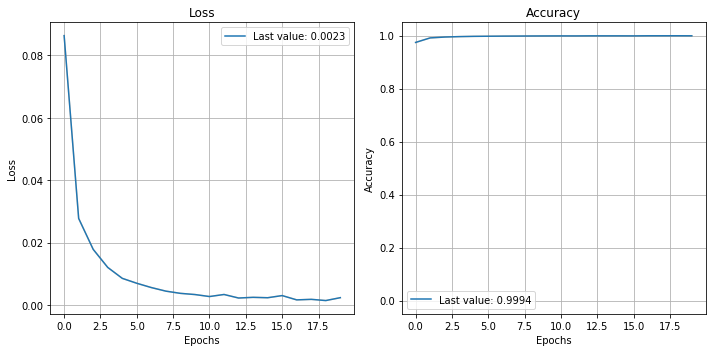

In [1]:
import pandas as pd
import numpy as np

from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from plot_keras_history import plot_history
import random 
import math

def define_discriminator(n_inputs):
	model = Sequential()
	model.add(Dense(8 *n_inputs, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(8 *n_inputs, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

def train_discrimantor_batch(discriminator,DD, M, N2, B):

    N1 = int(N2/3)
    
    for _ in range(B):
        
        x_real = np.zeros((N1,data_dim))
        y_real = np.zeros((N1,1))

        for n in range(N1):
            i = random.randint(0,N-1)
            for j in range(data_dim):
                x_real[n,j] = DArray[i][j] 
            y_real[n,0] = 1


        x_fake = np.zeros((N1,data_dim))
        y_fake = np.zeros((N1,1))

        for n in range(N1):
            fnd = 1
            while fnd == 1:
                x = []
                for j in range(data_dim):
                    x.append(random.randint(0,M-1))
                if tuple(x) not in DD.keys():
                    fnd = 0
            for j in range(data_dim):
                x_fake[n,j] = x[j]             
            y_fake[n,0] = 0

        x_train = np.zeros((3*N1, data_dim))
        y_train = np.zeros((3*N1, 1))

        for n in range(N1):
            for j in range(data_dim):
                x_train[3*n,j] = x_real[n,j]
                x_train[3*n+1,j] = x_fake[n,j]
                x_train[3*n+2,j] = random.random()
            y_train [3*n,0] = 1
            y_train [3*n + 1,0] = 0
            y_train [3*n + 2,0] = 0


        r = discriminator.train_on_batch(x_train, y_train)
        print (r)


def train_discrimantor(discriminator,DD, N, M, N2, E):

    N1 = int(N2/3)
        
    x_real = np.zeros((N1,data_dim))
    y_real = np.zeros((N1,1))
    
    for n in range(N1):
        i = random.randint(0,N-1)
        for j in range(data_dim):
            x_real[n,j] = DArray[i][j] 
        y_real[n,0] = 1


    x_fake = np.zeros((N1,data_dim))
    y_fake = np.zeros((N1,1))

    for n in range(N1):
        fnd = 1
        while fnd == 1:
            x = []
            for j in range(data_dim):
                x.append(random.randint(0,M-1))
            if tuple(x) not in DD.keys():
                fnd = 0
        for j in range(data_dim):
            x_fake[n,j] = x[j]             
        y_fake[n,0] = 0

    x_train = np.zeros((3*N1, data_dim))
    y_train = np.zeros((3*N1, 1))
    
    for n in range(N1):
        for j in range(data_dim):
            x_train[3*n,j] = x_real[n,j]
            x_train[3*n+1,j] = x_fake[n,j]
            x_train[3*n+2,j] = random.random()
        y_train [3*n,0] = 1
        y_train [3*n + 1,0] = 0
        y_train [3*n + 2,0] = 0
            

    r = discriminator.fit(x_train, y_train,epochs=E,verbose = 0)
    plot_history(r.history)

def prepare_data(M):

    rdata0 = pd.read_csv("BankChurners.csv")
    rdata = rdata0.drop([rdata0.columns[0],rdata0.columns[-1],rdata0.columns[-2]],axis=1)
    rdata.head()
    
    Dicts = []
    for c in range(len(rdata.columns)):
        l1 = rdata[rdata.columns[c]]
        l2 = list(dict.fromkeys(l1))
        l2.sort()
        nn = len(l2)
        Dicts.append(dict())
        for i in range(len(l2)):
            Dicts[c] [l2[i]] = i / nn 
    
    rM = 1./M

    DArray = np.zeros(  (rdata.shape[0], rdata.shape[1]),dtype = "float")
    DD = dict()
    
    for n in range(rdata.shape[0]):
        for c in range(rdata.shape[1]):
            #print (rdata [n,c])
            DArray[n,c] =  ( Dicts[c] [ rdata.iat [n,c]]) // rM
        DD[tuple(DArray[n,:]) ] = 1
        
    print (DArray.shape,  len(DD))
    print (DArray[1:3,:])
    return (DArray,DD)


def test_discriminator(discriminator, data_dim, DD, DA,  M, N1 ):
    
    db  = 0
    dbp = 0
    for _ in range(3):
        x_test = np.zeros((N1, data_dim))
        y_test = np.zeros((N1, 1))
    
        for n in range(N1):
            if random.random() < 0.1:
                m = random.randint(0, DA.shape[0]-1)
                for j in range(data_dim):
                    x_test[n,j] = DA[m,j]
                y_test[n,0] = 1
                dbp = dbp + 1
            else:
                for j in range(data_dim):
                    x_test[n,j] = random.randint(0,M-1)
                if tuple(x_test[n,:]) in DD.keys():
                    y_test[n,0] = 1
                    dbp = dbp + 1
                else:
                    y_test[n,0] = 0

        y_pred = discriminator.predict(x_test)

        for n in range(N1):
            if abs(y_pred[n]-y_test[n]) < .5:
                db = db + 1
           
    print ("accuracy=", db / (3*N1), dbp / (3*N1) )
    
    
            
M = 10    # values

(DArray, DDict)  = prepare_data(M)
N = DArray.shape[0]
data_dim = DArray.shape[1]

N2 = 100000  # train size
E = 20  # Epochs
B = 20  # batch 
N3 = 300   # test size

print ("Discriminator training")


discriminator = define_discriminator(data_dim)

print ("M:",M,"dim:",data_dim, "cube size:", M**data_dim, "real size:",N, " train_size:", N2,"epochs:", E, "test_size:", N3, "mode: real data")
train_discrimantor(discriminator, DDict, N,  M, N2, E)

#print ("M:",M,"dim:",data_dim, "cube size:", M**data_dim, "real size:",N, " train_size:", N2,"batch count:", B, "test_size:", N3, "mode: uniform_random")
#train_discrimantor_batch(discriminator, DDict,  M, N2, B)

test_discriminator(discriminator, data_dim, DDict, DArray, M, N3)

In [17]:
print (0.6 // 0.5)

1.0


In [39]:
X = [4., 5., 0., 8., 2., 4., 6., 0., 7., 8., 1., 2., 5., 2., 5., 9., 0., 1., 9., 1.]
X = [4., 5., 0., 8., 2., 4., 6., 0., 7., 8., 1., 2., 5., 2., 5., 9., 0., 1., 9., 1.]
XA = np.zeros((1,20))
print (XA.shape)
for i in range(20):
    XA[0,i] = X[i]
Y = discriminator.predict(XA)
print (Y)
if tuple(X) in DDict.keys():
    print ("real")
else:
    print ("fake")

(1, 20)
[[1.]]
fake
